#Set up

In [137]:
#Importanto a principal biblioteca de manipulação de dados em python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
#importando a biblioteca para manipular planilhas google
import gspread
from google.auth import default
creds, _ = default()

In [139]:
#Importanto o login google
from google.colab import auth
auth.authenticate_user()

#Aquisição de dados da planilha

In [140]:
#funcao para ler programaticamente uma planilha google e trazer os dados
def aquisicao_google_sheets(sheet_id, sheet_name):
    SHEET_ID = sheet_id
    SHEET_NAME = sheet_name
    gc = gspread.authorize(creds)
    spreadsheet = gc.open_by_key(SHEET_ID)
    worksheet = spreadsheet.worksheet(SHEET_NAME)
    rows = worksheet.get_all_records()
    df = pd.DataFrame(rows)
    return df

In [141]:
#aplicação da função para gerar um dataframe
df = aquisicao_google_sheets('1-CAXg02TyKlim4N75RcebFP4uoq92XLvnKi0mCwwOuA', 'dados_pontuacao')

In [142]:
df.columns

Index(['Variavel_1', 'Variavel_2', 'Variavel_3', 'Variavel_4', 'Variavel_5',
       'Variavel_6', 'Variavel_7'],
      dtype='object')

In [143]:
df

,Variavel_1,Variavel_2,Variavel_3,Variavel_4,Variavel_5,Variavel_6,Variavel_7
0,3,1,2,3,2,2,1
1,3,3,2,3,2,2,2
2,3,3,3,3,3,3,3
3,3,3,1,1,1,1,1
4,3,3,3,3,3,3,3
5,3,3,2,3,3,3,3
6,2,3,2,3,3,3,3
7,2,2,2,3,3,3,3
8,2,3,2,3,2,1,1
9,2,3,2,3,2,3,3


#Cálculo da pontuação final

In [146]:
df['pontuacao_final'] = df.sum(axis=1)

In [147]:
df

,Variavel_1,Variavel_2,Variavel_3,Variavel_4,Variavel_5,Variavel_6,Variavel_7,pontuacao_final
0,3,1,2,3,2,2,1,14
1,3,3,2,3,2,2,2,17
2,3,3,3,3,3,3,3,21
3,3,3,1,1,1,1,1,11
4,3,3,3,3,3,3,3,21
5,3,3,2,3,3,3,3,20
6,2,3,2,3,3,3,3,19
7,2,2,2,3,3,3,3,18
8,2,3,2,3,2,1,1,14
9,2,3,2,3,2,3,3,18


In [148]:
df.describe()

,Variavel_1,Variavel_2,Variavel_3,Variavel_4,Variavel_5,Variavel_6,Variavel_7,pontuacao_final
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000
mean,2.600000,2.700000,2.100000,2.800000,2.400000,2.400000,2.300000,17.300
std,0.516398,0.674949,0.567646,0.632456,0.699206,0.843274,0.948683,3.335
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000
25%,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,1.250000,14.750
50%,3.000000,3.000000,2.000000,3.000000,2.500000,3.000000,3.000000,18.000
75%,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,19.750
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,21.000


#Gerando dados sintéticos com base em amostra

In [149]:
dados_gerados = df[['Variavel_1', 'Variavel_2', 'Variavel_3', 'Variavel_4', 'Variavel_5', 'Variavel_6', 'Variavel_7']].sample(n=100, replace=True, random_state=1)

In [150]:
dados_gerados

,Variavel_1,Variavel_2,Variavel_3,Variavel_4,Variavel_5,Variavel_6,Variavel_7
5,3,3,2,3,3,3,3
8,2,3,2,3,2,1,1
9,2,3,2,3,2,3,3
5,3,3,2,3,3,3,3
0,3,1,2,3,2,2,1
...,...,...,...,...,...,...,...
4,3,3,3,3,3,3,3
4,3,3,3,3,3,3,3
7,2,2,2,3,3,3,3
7,2,2,2,3,3,3,3


In [151]:
dados_gerados['pontuacao_final'] = dados_gerados.sum(axis=1)

In [152]:
dados_gerados

,Variavel_1,Variavel_2,Variavel_3,Variavel_4,Variavel_5,Variavel_6,Variavel_7,pontuacao_final
5,3,3,2,3,3,3,3,20
8,2,3,2,3,2,1,1,14
9,2,3,2,3,2,3,3,18
5,3,3,2,3,3,3,3,20
0,3,1,2,3,2,2,1,14
...,...,...,...,...,...,...,...,...
4,3,3,3,3,3,3,3,21
4,3,3,3,3,3,3,3,21
7,2,2,2,3,3,3,3,18
7,2,2,2,3,3,3,3,18


In [153]:
dados_gerados.describe()

,Variavel_1,Variavel_2,Variavel_3,Variavel_4,Variavel_5,Variavel_6,Variavel_7,pontuacao_final
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.00000,100.000000,100.000000
mean,2.500000,2.640000,2.100000,2.84000,2.430000,2.47000,2.380000,17.360000
std,0.502519,0.643852,0.502519,0.54532,0.639681,0.78438,0.885118,2.949131
min,2.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,11.000000
25%,2.000000,2.000000,2.000000,3.00000,2.000000,2.00000,1.000000,14.000000
50%,2.500000,3.000000,2.000000,3.00000,3.000000,3.00000,3.000000,18.000000
75%,3.000000,3.000000,2.000000,3.00000,3.000000,3.00000,3.000000,19.250000
max,3.000000,3.000000,3.000000,3.00000,3.000000,3.00000,3.000000,21.000000


#Criando a média das variáveis

In [154]:
means_x = dados_gerados[['Variavel_1', 'Variavel_2', 'Variavel_3', 'Variavel_4', 'Variavel_5', 'Variavel_6', 'Variavel_7']].mean()

In [155]:
means_x

Variavel_1    2.50
Variavel_2    2.64
Variavel_3    2.10
Variavel_4    2.84
Variavel_5    2.43
Variavel_6    2.47
Variavel_7    2.38
dtype: float64

#Gráfico de comparação do candidato contra a média da amostra para as variáveis

In [156]:
from math import pi

# Função para criar um gráfico de radar
def plot_radar_chart(data_x_means, df, row_index):

    labels = data_x_means.index.tolist()
    num_vars = len(labels)

    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]  # complete the loop

    # Criação do gráfico
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], labels)

    # Conformando dados dos candidatos
    values = df.drop('pontuacao_final', axis=1).loc[row_index, labels].tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=f"Candidato")
    ax.fill(angles, values, alpha=0.25)

    # Conformando dados da média para comparação
    mean_values = data_x_means.tolist()
    mean_values += mean_values[:1]
    ax.plot(angles, mean_values, 'o-', linewidth=2, label='Média', color='r')
    ax.fill(angles, mean_values, 'r', alpha=0.1)

    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))

    plt.show()

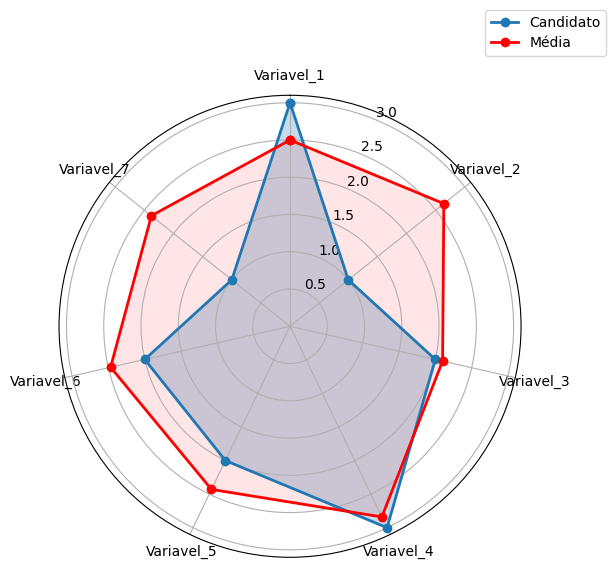

In [158]:
# Plotando o gráfico para o candidato em avaliação
plot_radar_chart(means_x, df, 0)

#Gráfico de comparação do candidato contra a média da amostra para pontuação final

In [159]:
def compare_score(df, dados_gerados, row_index):

    # Calcula a média da pontuação final no DataFrame df2
    mean_score_df2 = dados_gerados['pontuacao_final'].mean()

    # Obtém a pontuação da linha especificada em df1
    score_df1 = df.loc[row_index, 'pontuacao_final']

    # Cria o gráfico
    plt.figure(figsize=(8, 3))
    plt.barh(y=['Candidato', 'Média'], width=[score_df1, mean_score_df2], color=['blue', 'red'])
    plt.xlabel('Pontuação')
    plt.title(f'Comparação da Pontuação do Cadidato com a Média')
    plt.tight_layout()
    plt.show()

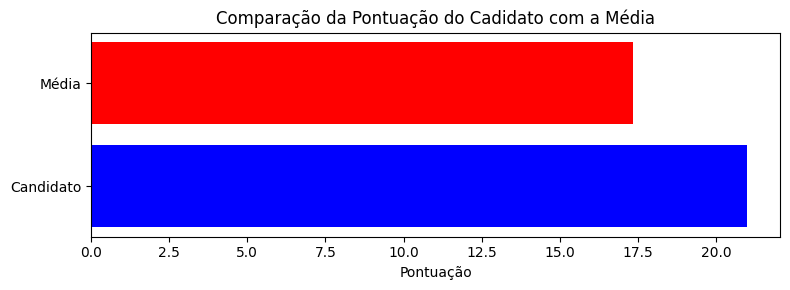

In [160]:
# Exemplo de uso:
compare_score(df, dados_gerados, row_index=4)  # Modifique 'row_index' para selecionar diferentes linhas